In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split




In [2]:
df = pd.read_csv('svm_dataset.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,193,50,16,375,25.9,0.655,24,0
1,11,155,76,28,150,33.3,1.353,51,1
2,3,191,68,15,130,30.9,0.299,34,0
3,3,141,0,0,0,30.0,0.761,27,1
4,4,95,70,32,0,32.1,0.612,24,0


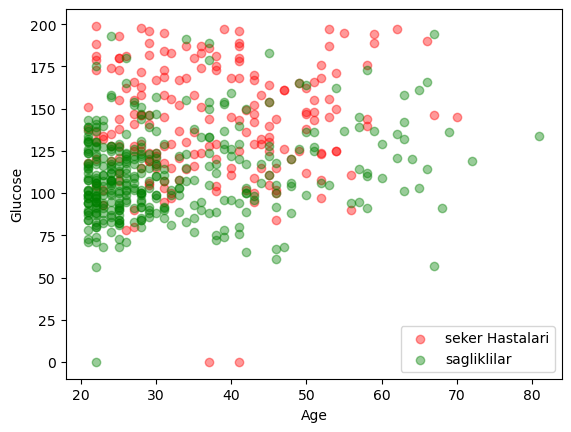

In [6]:
s_hastalari = df[df.Outcome==1]
sagliklilar = df[df.Outcome==0]

plt.scatter(s_hastalari.Age,s_hastalari.Glucose,color='red',label='seker Hastalari',alpha=0.4)
plt.scatter(sagliklilar.Age,sagliklilar.Glucose,color='green', label='sagliklilar',alpha=0.4)
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.legend()
plt.show()

In [8]:
# verileri sonuc ve bagimsilar olacak sekilde y ve x diye ayiriyorum
y = df.Outcome.values
x_orijinal = df.drop(['Outcome'],axis=1)

# bagimsiz degerleri normalize edelim
x = (x_orijinal - np.min(x_orijinal))/(np.max(x_orijinal) - np.min(x_orijinal))


In [9]:
# verileri test ve egitim icin bolelim
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=3)

In [11]:
# modeli olusturalim
svm_model = SVC(random_state = 1)
svm_model.fit(x_train,y_train)

SVC(random_state=1)

In [12]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,193,50,16,375,25.9,0.655,24,0
1,11,155,76,28,150,33.3,1.353,51,1
2,3,191,68,15,130,30.9,0.299,34,0
3,3,141,0,0,0,30.0,0.761,27,1
4,4,95,70,32,0,32.1,0.612,24,0


In [22]:
# simdi modeli bir deneyelim ama once kendi girdigimiz degerleri bir dataframe cevirelim

lst = [3,123,54,24,87,34,0.56,24]
lst2 = [1,12,94,54,117,14,0.66,34]
lst3 = [5,13,54,12,87,14,0.36,56]
arr = np.array([lst,lst2,lst3])
deneme = pd.DataFrame(arr)

In [23]:
print(svm_model.predict(deneme))

[1 1 1]


C:\Users\emirh\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [24]:
# son olarak modelin basarisina bakalim
print("modelin basarisi %", svm_model.score(x_test,y_test) * 100)

modelin basarisi % 73.68421052631578
